In [1]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Activation, Flatten, Dropout
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam, RMSprop 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
kk

In [3]:
!pip install pillow

In [4]:
from PIL import Image

In [5]:
class MnistModel:
    def create_model(self, shape=(28, 28, 1)):
        self.model = Sequential()
        self.model.add(Conv2D(64, (3, 3), input_shape=shape, name='conv1'))
        self.model.add(Activation('relu'))
        self.model.add(MaxPooling2D((2, 2), name='maxpool1'))
        
        self.model.add(Dropout(0.2))
        
        self.model.add(Conv2D(64, (3, 3), input_shape=(28, 28), name='conv2'))
        self.model.add(Activation('relu'))
        self.model.add(MaxPooling2D((2, 2), name='maxpool2'))

        self.model.add(Dropout(0.2))
        
        self.model.add(Conv2D(128, (3, 3), input_shape=(28, 28), name='conv3'))
        self.model.add(Activation('relu'))
        self.model.add(MaxPooling2D((2, 2), name='maxpool3'))

        self.model.add(Dropout(0.2))

        self.model.add(Flatten())
        self.model.add(Dense(10, name='dense1'))
        self.model.add(Activation('softmax'))
        self.model.summary()
        return self.model
    
    def train_model(self, x, y, x_val, y_val):
        self.model.compile(loss='categorical_crossentropy', 
                          optimizer=Adam(lr=1e-3),
                          metrics=['acc'])
        self.history = self.model.fit(x, y, epochs=50, batch_size=64, validation_data=(x_val, y_val))
        self.save_weights()
        self.plot_history()
        
        
    def predict(self, x):
        return self.model.predict(x)
    
    def save_weights(self, name='weights.h5'):
        self.model.save_weights(name)
    
    def load_weights(self, name='weights.h5'):
        self.model.load_weights(name)
        
    def plot_history(self):
        epochs = [x for x in range(1, len(self.history.history['acc']) + 1)]
        acc = np.array(self.history.history['acc'], dtype=np.float32)
        loss = np.array(self.history.history['loss'], dtype=np.float32)
        val_acc = np.array(self.history.history['val_acc'], dtype=np.float32)
        val_loss = np.array(self.history.history['val_loss'], dtype=np.float32)
        
        plt.subplot(221)
        plt.plot(epochs, acc, 'b')
        plt.title('Accuracy')
        plt.subplot(222)
        plt.plot(epochs, loss, 'r')
        plt.title('Loss')
        plt.subplot(223)
        plt.plot(epochs, val_acc, 'b')
        plt.title('Validation Accuracy')
        plt.subplot(224)
        plt.plot(epochs, val_loss, 'r')
        plt.title("Validation Loss")
        plt.show()

In [6]:
model = MnistModel()
model.create_model((28, 28, 1))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
maxpool1 (MaxPooling2D)      (None, 13, 13, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 64)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
maxpool2 (MaxPooling2D)      (None, 5, 5, 64)          0

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 126us/sample - loss: 0.3233 - acc: 0.8987 - val_loss: 0.0908 - val_acc: 0.9714
Epoch 2/50
50000/50000 [==============================] - 4s 75us/sample - loss: 0.1123 - acc: 0.9653 - val_loss: 0.0576 - val_acc: 0.9841
Epoch 3/50
50000/50000 [==============================] - 4s 76us/sample - loss: 0.0858 - acc: 0.9734 - val_loss: 0.0511 - val_acc: 0.9844
Epoch 4/50
50000/50000 [==============================] - 4s 75us/sample - loss: 0.0701 - acc: 0.9783 - val_loss: 0.0448 - val_acc: 0.9879
Epoch 5/50
50000/50000 [==============================] - 4s 76us/sample - loss: 0.0603 - acc: 0.9813 - val_loss: 0.0376 - val_acc: 0.9900
Epoch 6/50
50000/50000 [==============================] - 4s 76us/sample - loss: 0.0545 - acc: 0.9829 - val_loss: 0.0407 - val_acc: 0.9886
Epoch 7/50
50000/50000 [==============================] - 4s 74us/sample - loss: 0.0474 - acc: 0.9849 - val_loss: 0

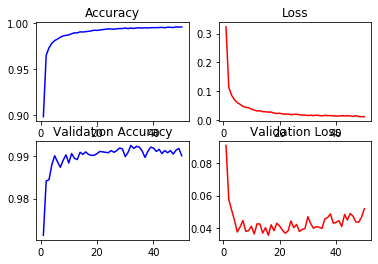

In [7]:
model.train_model(x_train[:50000], y_train[:50000], x_train[50000:], y_train[50000:])

In [8]:
def plot(x, y_pred):
    columns = 5 if len(x) >= 5 else 1
    rows = (len(x) // columns) if len(x) >= 5 else 1
    print(f"rows: {rows}, columns: {columns}")
    
    fig, axs = plt.subplots(rows, columns, figsize=(18, 18))

    for ax, img, number in zip(axs.flat, x, y_pred):
        ax.imshow(img)
        ax.set_title('Number: {} ({}%)'.format(str(np.argmax(number)), str(max(number*100))))
    plt.tight_layout()
    plt.show()

rows: 4, columns: 5


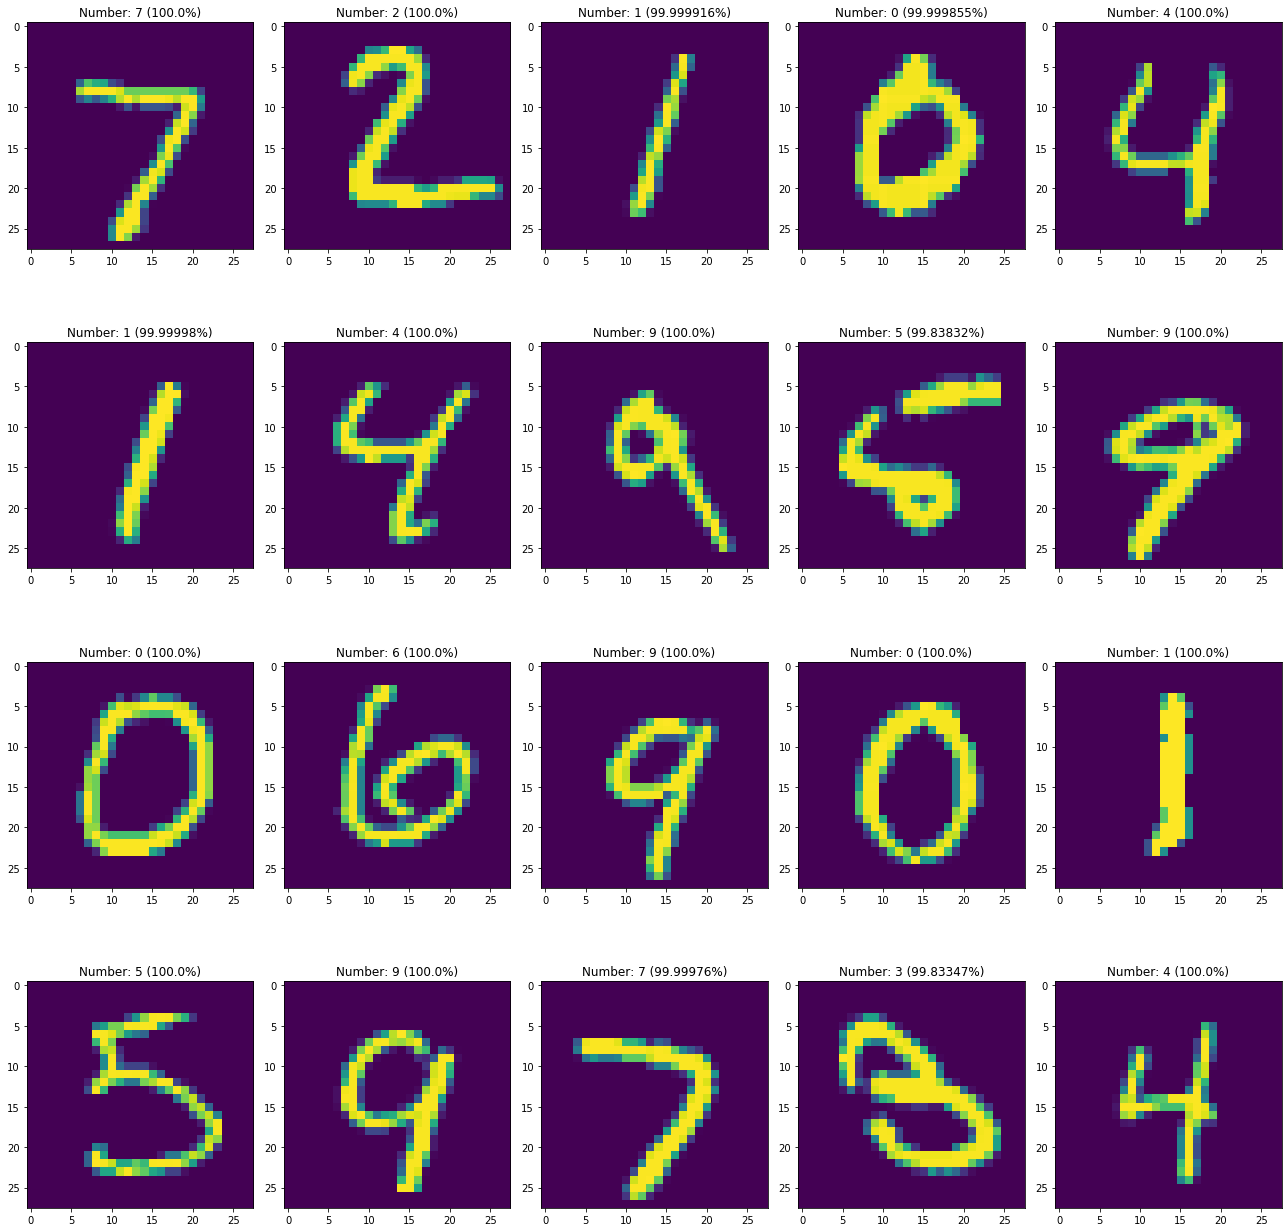

In [9]:
plot(x_test[:21].reshape(-1, 28, 28), model.predict(x_test[:21])):

rows: 4, columns: 5


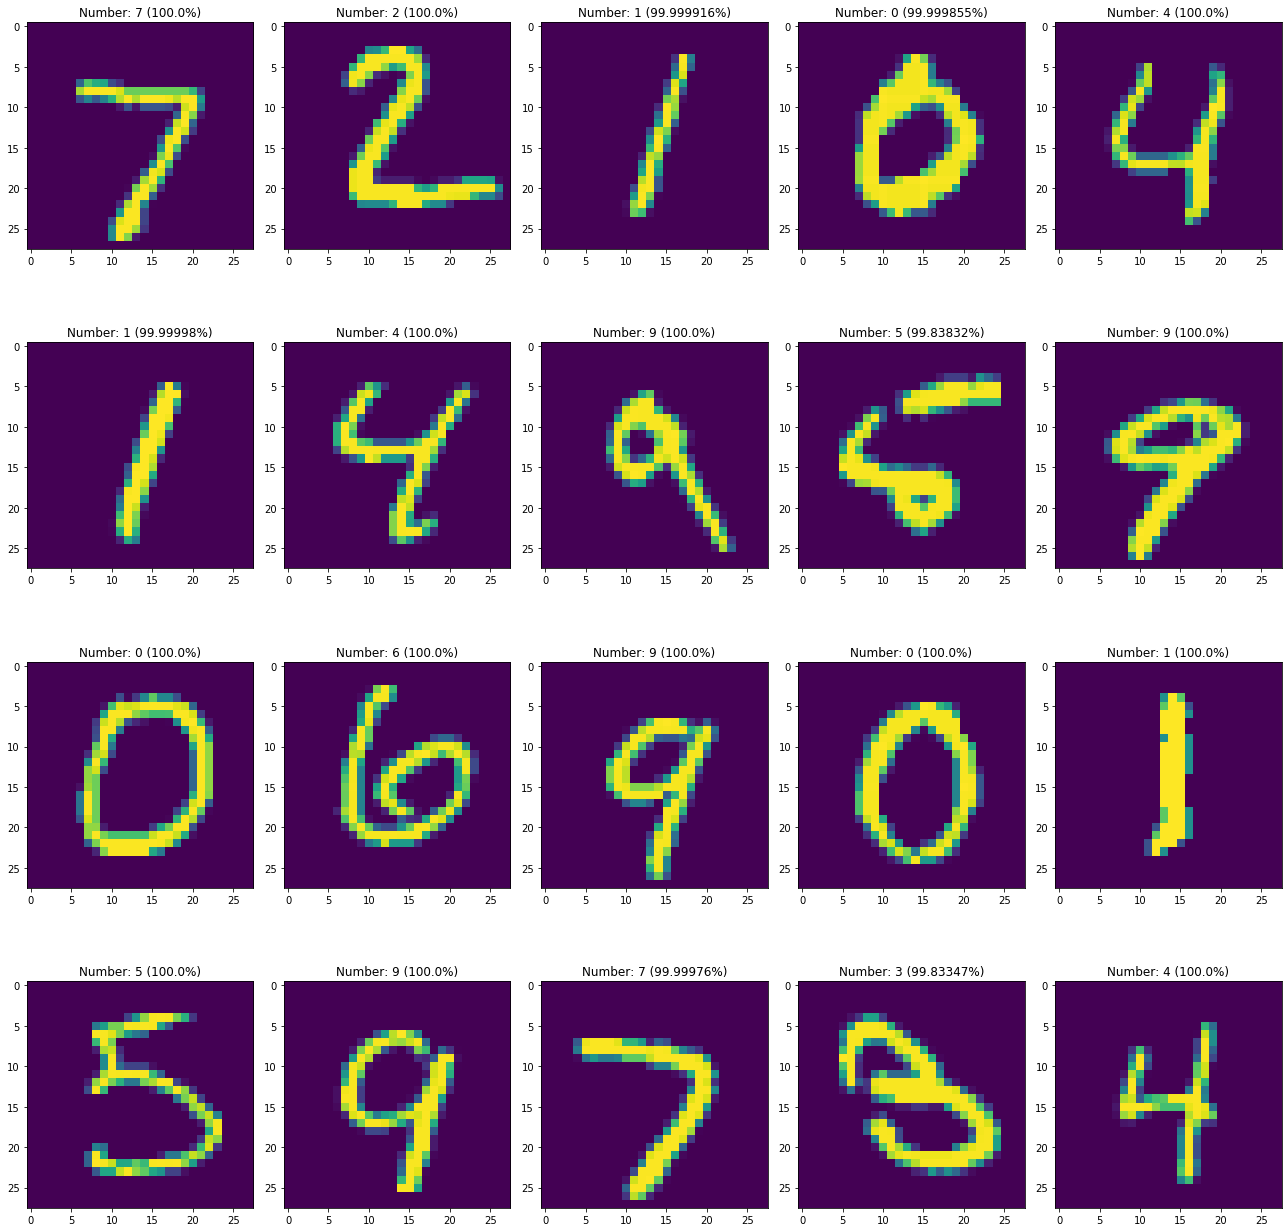

In [10]:
plot(x_test[:21].reshape(-1, 28, 28), model.predict(x_test[:21]))